### Детекция препятствия в лидарном облаке

In [1]:
import pandas as pd
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
left_side_img = mpimg.imread('left_side.png')
front_img = mpimg.imread('front.png')
right_side_img = mpimg.imread('right_side.png')
point_cloud = pd.read_csv("point_cloud.csv")

In [2]:
point_cloud[:2]

,x,y,z,ring,intensity
0,-0.693176,-6.937660,0.646034,16,15
1,0.311096,-3.328461,-0.072472,1,1


#### Глянем на данные

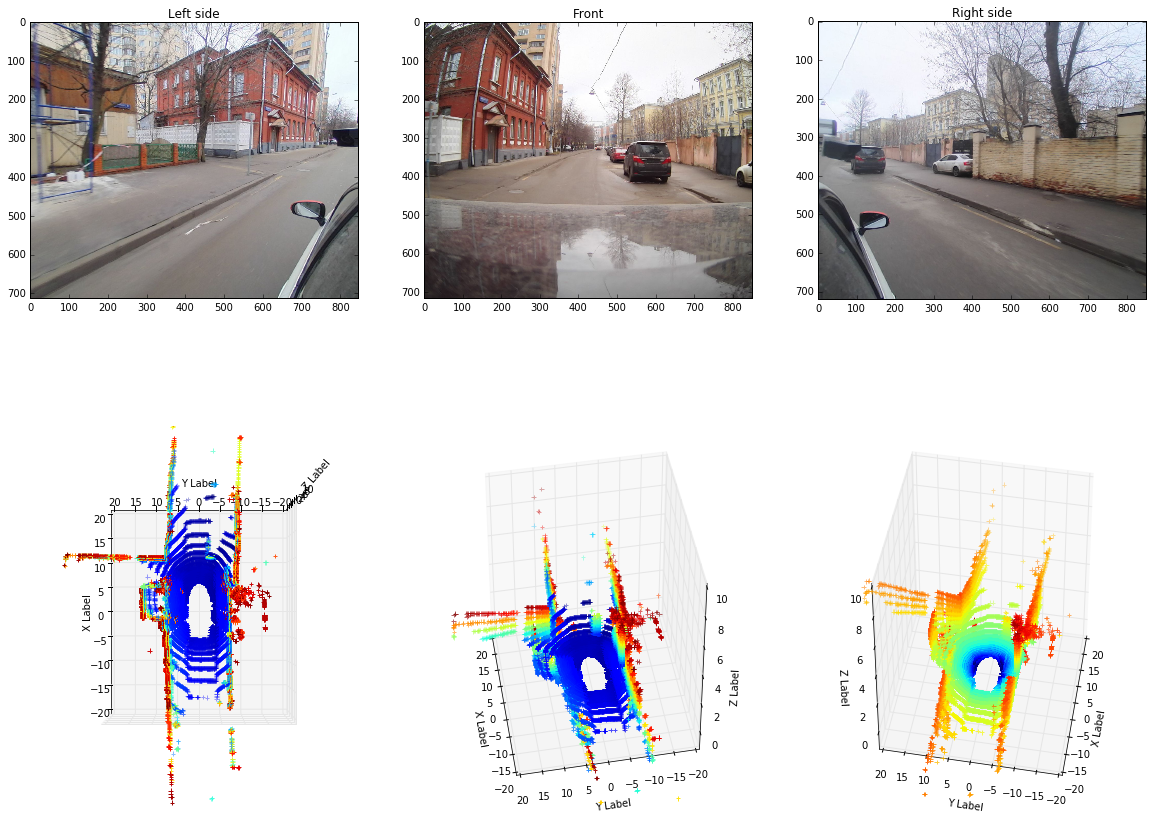

In [3]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
fig = plt.figure(figsize=(20, 15))

a=fig.add_subplot(231)
imgplot = plt.imshow(left_side_img)
a.set_title('Left side')
a=fig.add_subplot(232)
imgplot = plt.imshow(front_img)
a.set_title('Front')
a=fig.add_subplot(233)
imgplot = plt.imshow(right_side_img)
a.set_title('Right side')

#tiny_cloud = point_cloud[point_cloud['z'] < 3].sample(frac=1)[:(point_cloud.shape[0] / 2)]
tiny_cloud = point_cloud[point_cloud['z'] < 3]
ax = fig.add_subplot(234, projection='3d')
ax.set_xlim(left=-20, right=20)
ax.set_ylim(bottom=-20, top=20)
ax.set_zlim(bottom=-1.0, top=10.0)
ax.scatter(tiny_cloud['x'], tiny_cloud['y'], tiny_cloud['z'], c=tiny_cloud['z'], marker='+')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=180, elev=90)

ax = fig.add_subplot(235, projection='3d')
ax.set_xlim(left=-20, right=20)
ax.set_ylim(bottom=-20, top=20)
ax.set_zlim(bottom=-1.0, top=10.0)
ax.scatter(tiny_cloud['x'], tiny_cloud['y'], tiny_cloud['z'], c=tiny_cloud['z'], marker='+')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=170, elev=40)

ax = fig.add_subplot(236, projection='3d')
ax.set_xlim(left=-20, right=20)
ax.set_ylim(bottom=-20, top=20)
ax.set_zlim(bottom=-1.0, top=10.0)
ax.scatter(tiny_cloud['x'], tiny_cloud['y'], tiny_cloud['z'], c=tiny_cloud['ring'], marker='+')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=190, elev=40)

plt.show()

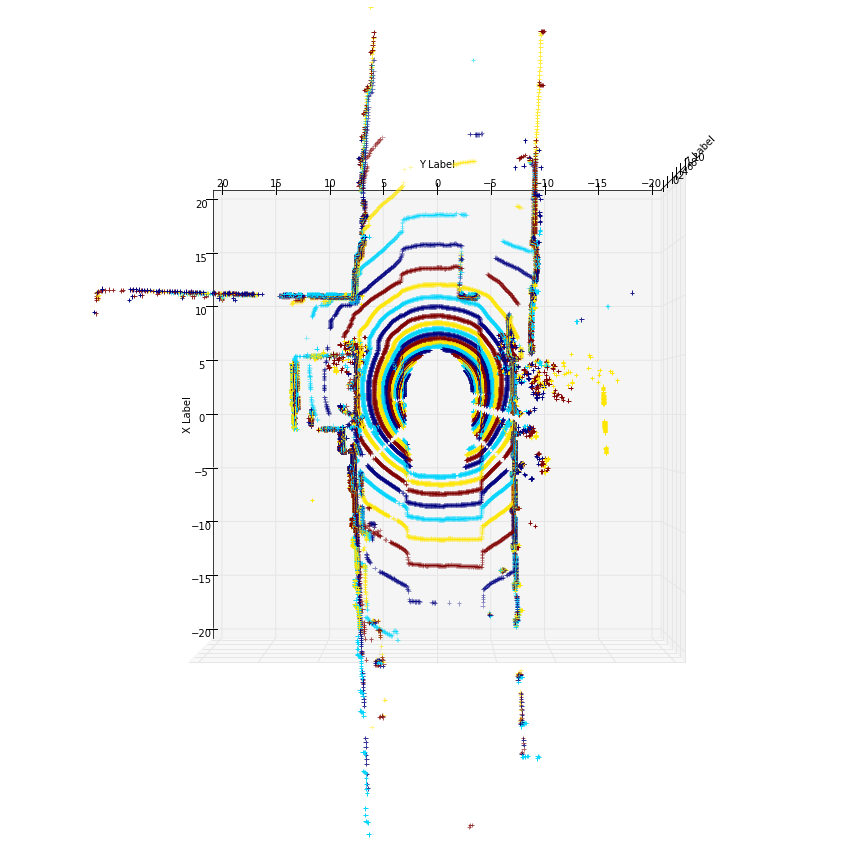

In [4]:
%matplotlib gtk
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(left=-20, right=20)
ax.set_ylim(bottom=-20, top=20)
ax.set_zlim(bottom=-1.0, top=10.0)
ax.scatter(tiny_cloud['x'], tiny_cloud['y'], tiny_cloud['z'], c=(tiny_cloud['ring'] % 4), marker='+')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=180, elev=90)
plt.show()

In [5]:
CEILING = 3.0
FLOOR = -0.5
point_cloud = point_cloud[point_cloud['z'] < CEILING]
point_cloud = point_cloud[point_cloud['z'] > FLOOR]

### Реализуем простой высотный детектор

In [6]:
def get_dummy_obstacle_detections(min_obstacle_height):
    pillars = {}
    for point in np.array(point_cloud):
        # Сгенерить столбцы из точек
    obstacle_pillars = []
    for pillar_position in pillars:
        # Выбрать столбцы, которые соответствую препятствиям
    # Предполагается, что в obstacle_pillars массив вида: (x1, y1), (x2, y2)
    return pd.DataFrame(obstacle_pillars)

dummy_detections = get_dummy_obstacle_detections(0.1)

IndentationError: expected an indented block (<ipython-input-6-52019e161cbc>, line 5)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
plt.plot(dummy_detections[0], dummy_detections[1], '+')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.show()

### Реализуем классический Virtual Scan

In [ ]:
import math

def get_virtual_scan_obstacle_detections(max_alpha, sectors = 720):
    rings = max(point_cloud.ring) + 1
    space = [[(np.inf, np.inf, np.inf) for i in range(rings)] for j in range(sectors)]
    
    for point in np.array(point_cloud):
        x = point[0]
        y = point[1]
        z = point[2]
        ring = int(point[3])
        # Считаем в какой сектор попала точка
        space[sector][ring] = (x, y, z)

    obstacles = []
    for sector in range(0, sectors):
        for ring in range(2, rings):
            # Используем критерий препятствия
    return pd.DataFrame(obstacles)

vscan_detections = get_virtual_scan_obstacle_detections(10 * math.pi / 180)

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(20, 20))
plt.plot(dummy_detections[0], dummy_detections[1], '+')
plt.plot(vscan_detections[0], vscan_detections[1], 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid(True)
plt.show()

### Где выигрывает VScan у простого высотного детектора? Есть ли области, где высотный лучше?